## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-04-23.csv', firstRow=336, lastRow=342)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_240423_S337-342.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=70s and ended at t=446s; mass=44.923049999999996g
This equals a volume of 45.013m; expected was 45.13mL; error is 0.259%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00375 g/s and for 2nd derivative = 0.0008593750000000001 g/s^2


<IPython.core.display.Javascript object>


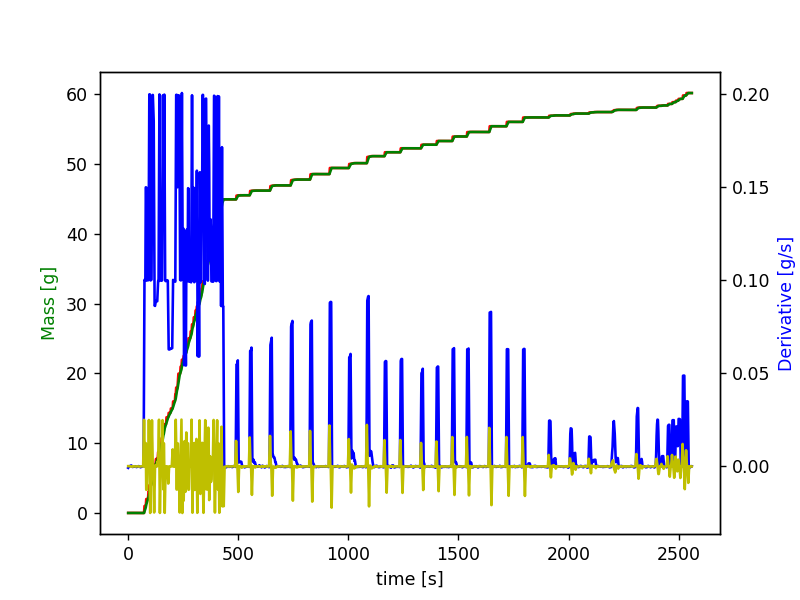

Addition of 0.569g Plantapon ACG 50 detected from 486s to 506s - expected volume = 0.553mL and actual volume = 0.505mL (resulting error is 8.668%)
Addition of 0.658g Plantapon ACG 50 detected from 548s to 572s - expected volume = 0.553mL and actual volume = 0.584mL (resulting error is 5.57%)
Addition of 0.745g Plantacare 818 detected from 640s to 670s - expected volume = 0.826mL and actual volume = 0.681mL (resulting error is 17.566%)
Addition of 0.836g Plantacare 2000 detected from 734s to 766s - expected volume = 0.889mL and actual volume = 0.759mL (resulting error is 14.627%)
Addition of 0.787g Dehyton MC detected from 822s to 842s - expected volume = 0.763mL and actual volume = 0.724mL (resulting error is 5.103%)
Addition of 0.877g Dehyton PK 45 detected from 910s to 930s - expected volume = 0.859mL and actual volume = 0.834mL (resulting error is 2.931%)
Addition of 0.697g Dehyton ML detected from 998s to 1030s - expected volume = 0.796mL and actual volume = 0.65mL (resulting error

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00375 g/s and for 2nd derivative = 0.0009635416666666666 g/s^2


<IPython.core.display.Javascript object>


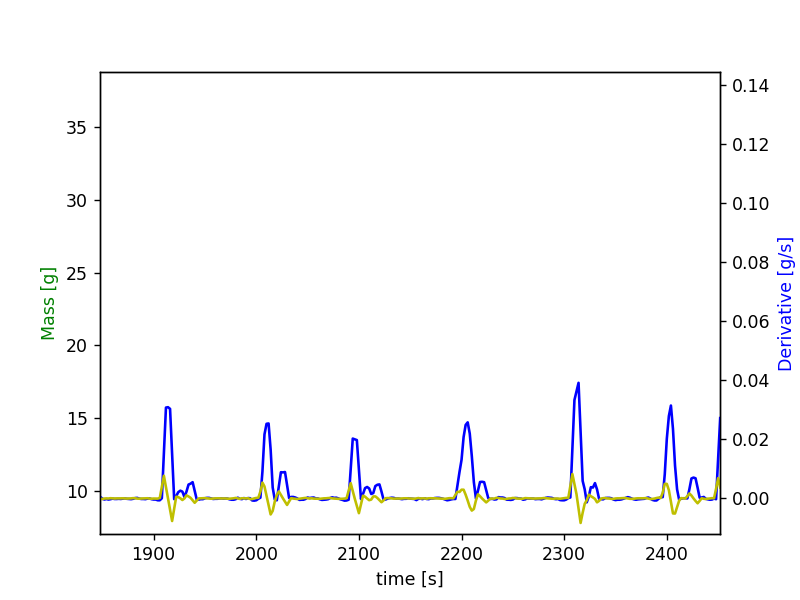

Addition of 0.297g Dehyquart CC7 Benz detected from 1906s to 1944s - expected volume = 0.223mL and actual volume = 0.291mL (resulting error is 30.373%)
Addition of 0.273g Dehyquart CC7 Benz detected from 2002s to 2036s - expected volume = 0.173mL and actual volume = 0.265mL (resulting error is 53.441%)
Addition of 0.216g Dehyquart CC7 Benz detected from 2088s to 2126s - expected volume = 0.133mL and actual volume = 0.214mL (resulting error is 60.37%)
Addition of 0.322g Dehyquart CC7 Benz detected from 2192s to 2228s - expected volume = 0.25mL and actual volume = 0.316mL (resulting error is 26.176%)
Addition of 0.344g Dehyquart CC7 Benz detected from 2304s to 2336s - expected volume = 0.231mL and actual volume = 0.342mL (resulting error is 48.114%)
Addition of 0.307g Dehyquart CC7 Benz detected from 2394s to 2434s - expected volume = 0.232mL and actual volume = 0.303mL (resulting error is 30.798%)


In [5]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.0075 g/s and for 2nd derivative = 0.0028125000000000003 g/s^2


<IPython.core.display.Javascript object>


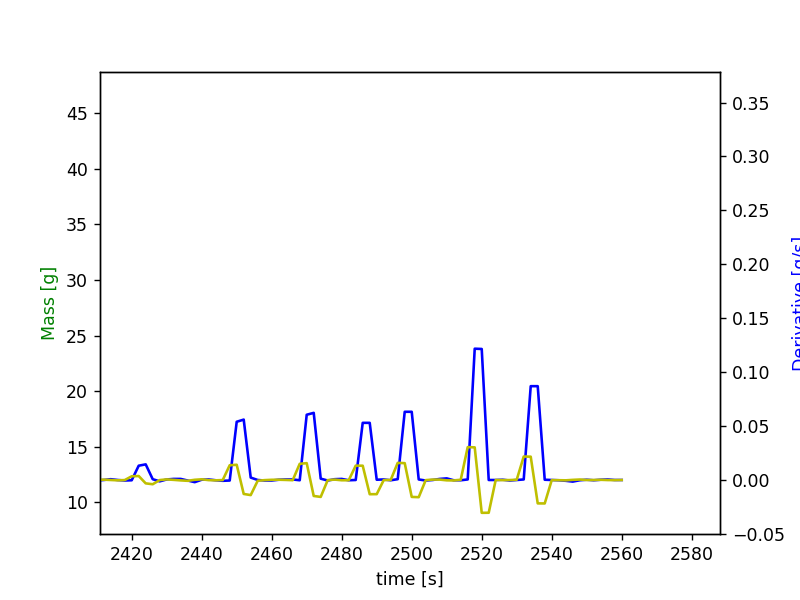

Addition of 0.221g Arlypon F detected from 2446s to 2458s - expected volume = 0.245mL and actual volume = 0.249mL (resulting error is 1.613%)
Addition of 0.25g Arlypon F detected from 2466s to 2478s - expected volume = 0.266mL and actual volume = 0.281mL (resulting error is 5.485%)
Addition of 0.214g Arlypon F detected from 2482s to 2494s - expected volume = 0.224mL and actual volume = 0.244mL (resulting error is 8.883%)
Addition of 0.255g Arlypon F detected from 2494s to 2506s - expected volume = 0.276mL and actual volume = 0.289mL (resulting error is 4.938%)
Addition of 0.487g Arlypon F detected from 2514s to 2526s - expected volume = 0.531mL and actual volume = 0.559mL (resulting error is 5.184%)
Addition of 0.348g Arlypon F detected from 2530s to 2542s - expected volume = 0.367mL and actual volume = 0.396mL (resulting error is 7.74%)


In [6]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_210423_S331-S336.csv', index=False)
actualMassFractions